# AWS Glue Studio Notebook
##### You are now running a AWS Glue Studio notebook; To start using your notebook you need to start an AWS Glue Interactive Session.


#### Optional: Run this cell to see available notebook commands ("magics").


In [2]:
%help

Welcome to the Glue Interactive Sessions Kernel
For more information on available magic commands, please type %help in any new cell.

Please view our Getting Started page to access the most up-to-date information on the Interactive Sessions kernel: https://docs.aws.amazon.com/glue/latest/dg/interactive-sessions.html
Installed kernel version: 1.0.5 



# Available Magic Commands

## Sessions Magic

----
    %help                             Return a list of descriptions and input types for all magic commands. 
    %profile            String        Specify a profile in your aws configuration to use as the credentials provider.
    %region             String        Specify the AWS region in which to initialize a session. 
                                      Default from ~/.aws/config on Linux or macOS, 
                                      or C:\Users\ USERNAME \.aws\config" on Windows.
    %idle_timeout       Int           The number of minutes of inactivity after which a session will timeout. 
                                      Default: 2880 minutes (48 hours).
    %timeout            Int           The number of minutes after which a session will timeout. 
                                      Default: 2880 minutes (48 hours).
    %session_id_prefix  String        Define a String that will precede all session IDs in the format 
                                      [session_id_prefix]-[session_id]. If a session ID is not provided,
                                      a random UUID will be generated.
    %status                           Returns the status of the current Glue session including its duration, 
                                      configuration and executing user / role.
    %session_id                       Returns the session ID for the running session.
    %list_sessions                    Lists all currently running sessions by ID.
    %stop_session                     Stops the current session.
    %glue_version       String        The version of Glue to be used by this session. 
                                      Currently, the only valid options are 2.0, 3.0 and 4.0. 
                                      Default: 2.0.
    %reconnect          String        Specify a live session ID to switch/reconnect to the sessions.
----

## Selecting Session Types

----
    %streaming          String        Sets the session type to Glue Streaming.
    %etl                String        Sets the session type to Glue ETL.
    %glue_ray           String        Sets the session type to Glue Ray.
    %session_type       String        Specify a session_type to be used. Supported values: streaming, etl and glue_ray. 
----

## Glue Config Magic 
*(common across all session types)*

----

    %%configure         Dictionary    A json-formatted dictionary consisting of all configuration parameters for 
                                      a session. Each parameter can be specified here or through individual magics.
    %iam_role           String        Specify an IAM role ARN to execute your session with.
                                      Default from ~/.aws/config on Linux or macOS, 
                                      or C:\Users\%USERNAME%\.aws\config` on Windows.
    %number_of_workers  int           The number of workers of a defined worker_type that are allocated 
                                      when a session runs.
                                      Default: 5.
    %additional_python_modules  List  Comma separated list of additional Python modules to include in your cluster 
                                      (can be from Pypi or S3).
    %%tags        Dictionary          Specify a json-formatted dictionary consisting of tags to use in the session.
    
    %%assume_role Dictionary, String  Specify a json-formatted dictionary or an IAM role ARN string to create a session 
                                      for cross account access.
                                      E.g. {valid arn}
                                      %%assume_role 
                                      'arn:aws:iam::XXXXXXXXXXXX:role/AWSGlueServiceRole' 
                                      E.g. {credentials}
                                      %%assume_role
                                      {
                                            "aws_access_key_id" : "XXXXXXXXXXXX",
                                            "aws_secret_access_key" : "XXXXXXXXXXXX",
                                            "aws_session_token" : "XXXXXXXXXXXX"
                                       }
----

                                      
## Magic for Spark Sessions (ETL & Streaming)

----
    %worker_type        String        Set the type of instances the session will use as workers. 
    %connections        List          Specify a comma separated list of connections to use in the session.
    %extra_py_files     List          Comma separated list of additional Python files From S3.
    %extra_jars         List          Comma separated list of additional Jars to include in the cluster.
    %spark_conf         String        Specify custom spark configurations for your session. 
                                      E.g. %spark_conf spark.serializer=org.apache.spark.serializer.KryoSerializer
----
                                      
## Magic for Ray Session

----
    %min_workers        Int           The minimum number of workers that are allocated to a Ray session. 
                                      Default: 1.
    %object_memory_head Int           The percentage of free memory on the instance head node after a warm start. 
                                      Minimum: 0. Maximum: 100.
    %object_memory_worker Int         The percentage of free memory on the instance worker nodes after a warm start. 
                                      Minimum: 0. Maximum: 100.
----

## Action Magic

----

    %%sql               String        Run SQL code. All lines after the initial %%sql magic will be passed
                                      as part of the SQL code.  
    %matplot      Matplotlib figure   Visualize your data using the matplotlib library.
                                      E.g. 
                                      import matplotlib.pyplot as plt
                                      # Set X-axis and Y-axis values
                                      x = [5, 2, 8, 4, 9]
                                      y = [10, 4, 8, 5, 2]
                                      # Create a bar chart 
                                      plt.bar(x, y) 
                                      # Show the plot
                                      %matplot plt    
    %plotly            Plotly figure  Visualize your data using the plotly library.
                                      E.g.
                                      import plotly.express as px
                                      #Create a graphical figure
                                      fig = px.line(x=["a","b","c"], y=[1,3,2], title="sample figure")
                                      #Show the figure
                                      %plotly fig

  
                
----



####  Run this cell to set up and start your interactive session.


In [1]:
%idle_timeout 2880
%glue_version 4.0
%worker_type G.1X
%number_of_workers 5

import sys
from awsglue.transforms import *
from awsglue.utils import getResolvedOptions
from pyspark.context import SparkContext
from awsglue.context import GlueContext
from awsglue.job import Job
  
sc = SparkContext.getOrCreate()
glueContext = GlueContext(sc)
spark = glueContext.spark_session
job = Job(glueContext)

Current idle_timeout is None minutes.
idle_timeout has been set to 2880 minutes.
Setting Glue version to: 4.0
Previous worker type: None
Setting new worker type to: G.1X
Previous number of workers: None
Setting new number of workers to: 5
Trying to create a Glue session for the kernel.
Session Type: glueetl
Worker Type: G.1X
Number of Workers: 5
Idle Timeout: 2880
Session ID: 512e2a6d-caac-461e-b5c4-4cb89dfd8cba
Applying the following default arguments:
--glue_kernel_version 1.0.5
--enable-glue-datacatalog true
Waiting for session 512e2a6d-caac-461e-b5c4-4cb89dfd8cba to get into ready status...
Session 512e2a6d-caac-461e-b5c4-4cb89dfd8cba has been created.



#### Example: Create a DynamicFrame from a table in the AWS Glue Data Catalog and display its schema


In [2]:
dyf = glueContext.create_dynamic_frame.from_catalog(database='mygluedb', table_name='mygluetbl')
dyf.printSchema()

root
|-- col0: string
|-- col1: string
|-- col2: string
|-- col3: string
|-- col4: string
|-- col5: string
|-- col6: string
|-- col7: string
|-- col8: string
|-- col9: string
|-- col10: string
|-- col11: string
|-- col12: string
|-- col13: string
|-- col14: string
|-- col15: string
|-- col16: string
|-- col17: string


#### Example: Convert the DynamicFrame to a Spark DataFrame and display a sample of the data


In [3]:
df = dyf.toDF()
df.show()

+--------+--------------------+--------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+--------------------+------------+--------------------+
|    col0|                col1|                col2|           col3|         col4|      col5|              col6|        col7|        col8|        col9|      col10|col11|  col12|     col13|       col14|               col15|       col16|               col17|
+--------+--------------------+--------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+--------------------+------------+--------------------+
|VendorID|tpep_pickup_datetime|tpep_dropoff_date...|passenger_count|trip_distance|RatecodeID|store_and_fwd_flag|PULocationID|DOLocationID|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surch...|total_a

#### Example: Visualize data with matplotlib


<BarContainer object of 5 artists>



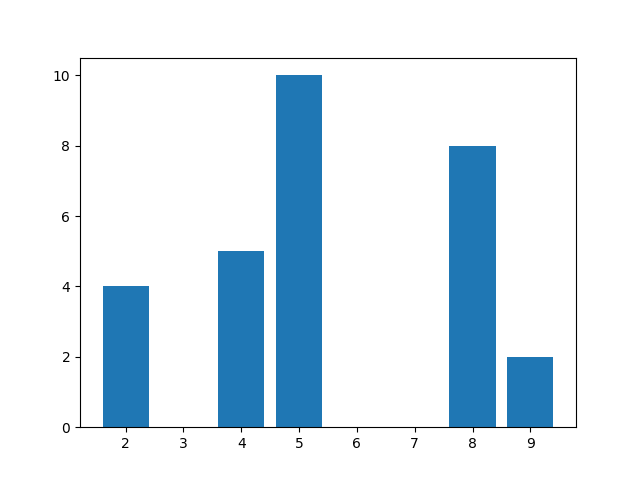

In [4]:
import matplotlib.pyplot as plt

# Set X-axis and Y-axis values
x = [5, 2, 8, 4, 9]
y = [10, 4, 8, 5, 2]
  
# Create a bar chart 
plt.bar(x, y)
  
# Show the plot
%matplot plt

#### Example: Write the data in the DynamicFrame to a location in Amazon S3 and a table for it in the AWS Glue Data Catalog


In [9]:
s3output = glueContext.getSink(
  path="s3://transformedbkt/",
  connection_type="s3",
  updateBehavior="UPDATE_IN_DATABASE",
  partitionKeys=[],
  compression="snappy",
  enableUpdateCatalog=True,
  transformation_ctx="s3output",
)
s3output.setCatalogInfo(
  catalogDatabase="mygluedb", catalogTableName="mygluetbl"
)
s3output.setFormat("glueparquet")
s3output.writeFrame(dyf)